# !!! ATTENTION !!!

My PC takes about about 4 and half minutes to run every cell of the notebook.

# Kuzushiji Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a variant of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) and is a dataset of traditional japanese handwritten kana.



The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

## TODO: Insert your surname, name and ID number

Student surname: Agosti

Student name: Luca
    
ID: 2062889

In [27]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

import sklearn as sk
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [28]:
# helper function to load Kuzushiji-MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [29]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 2062889
np.random.seed(ID)

In [30]:
#load the K-MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [31]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [56 58 56 51 73 65 54 61 58 68]


In [32]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


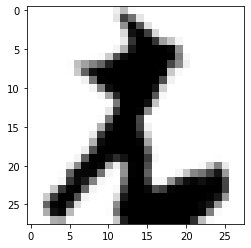

LABEL: 5
INPUT:


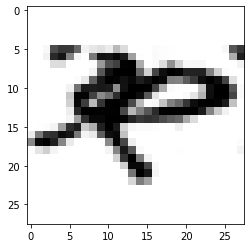

LABEL: 7
INPUT:


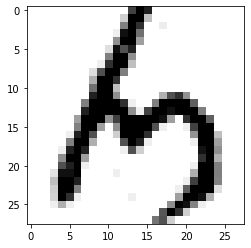

LABEL: 3
INPUT:


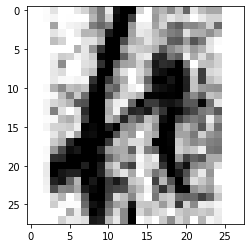

LABEL: 8


In [33]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [34]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import cross_val_score

parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]} #parameters for linear SVM

Kfolds = 4

BestScore = 0

BestModel = 0

print ('RESULTS FOR LINEAR KERNEL\n')

print("Number of K-fold:", Kfolds)

print("\nAll scores on the grid:")

for c in parameters["C"]: #train linear SVM
    print("C =",c)
    clf = SVC(kernel='linear', C = c)
    scores = cross_val_score(clf, X_train, y_train, cv=Kfolds)
    print("Scores on the Kfolds: ",scores, "\n")
    if np.sum(scores) > np.sum(BestScore):
        BestScore = scores
        BestModel = c

print("Best parameters set found: C =", BestModel)

print("Best average score with best parameters on the K-folds:", 1/Kfolds*np.sum(BestScore))

RESULTS FOR LINEAR KERNEL

Number of K-fold: 4

All scores on the grid:
C = 0.001
Scores on the Kfolds:  [0.38 0.44 0.45 0.39] 

C = 0.01
Scores on the Kfolds:  [0.77 0.66 0.79 0.73] 

C = 0.1
Scores on the Kfolds:  [0.79 0.7  0.71 0.71] 

C = 1
Scores on the Kfolds:  [0.78 0.7  0.71 0.71] 

C = 10
Scores on the Kfolds:  [0.78 0.7  0.71 0.71] 

C = 100
Scores on the Kfolds:  [0.78 0.7  0.71 0.71] 

Best parameters set found: C = 0.01
Best average score with best parameters on the K-folds: 0.7366666666666667


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [35]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

BestScore = 0

BestModel = {'C': [],'gamma':[]}

#run SVM with poly of degree 2 kernel

print ('RESULTS FOR POLY DEGREE=2 KERNEL\n')

print("Number of K-fold:", Kfolds)

print("\nAll scores on the grid:")

for c in parameters["C"]:
    for g in parameters["gamma"]:
        print("C =", c ,"gamma =", g)
        clf = SVC(kernel='poly', degree = 2, C = c, gamma = g)
        scores = cross_val_score(clf, X_train, y_train, cv=Kfolds)
        print("Scores on the Kfolds: ",scores, "\n")
        if np.sum(scores) > np.sum(BestScore):
            BestScore = scores
            BestModel["C"] = c
            BestModel["gamma"] = g

print("Best parameters set found: C =", BestModel["C"], "gamma =", BestModel["gamma"])

print("Best average score with best parameters on the K-folds:", 1/Kfolds*np.sum(BestScore))

RESULTS FOR POLY DEGREE=2 KERNEL

Number of K-fold: 4

All scores on the grid:
C = 0.01 gamma = 0.01
Scores on the Kfolds:  [0.12 0.12 0.12 0.13] 

C = 0.01 gamma = 0.1
Scores on the Kfolds:  [0.79 0.69 0.76 0.72] 

C = 0.01 gamma = 1
Scores on the Kfolds:  [0.78 0.75 0.77 0.74] 

C = 0.1 gamma = 0.01
Scores on the Kfolds:  [0.41 0.44 0.5  0.38] 

C = 0.1 gamma = 0.1
Scores on the Kfolds:  [0.77 0.76 0.78 0.73] 

C = 0.1 gamma = 1
Scores on the Kfolds:  [0.78 0.75 0.77 0.74] 

C = 1 gamma = 0.01
Scores on the Kfolds:  [0.79 0.69 0.76 0.72] 

C = 1 gamma = 0.1
Scores on the Kfolds:  [0.78 0.75 0.77 0.74] 

C = 1 gamma = 1
Scores on the Kfolds:  [0.78 0.75 0.77 0.74] 

Best parameters set found: C = 0.1 gamma = 0.1
Best average score with best parameters on the K-folds: 0.7616666666666667


## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [36]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of higher degree kernel
degree = 3

BestScore = 0

BestModel = {'C': [],'gamma':[]}

print ('RESULTS FOR POLY DEGREE =', degree, ' KERNEL\n')

print("Number of K-fold:", Kfolds)

print("\nAll scores on the grid:")

for c in parameters["C"]:
    for g in parameters["gamma"]:
        print("C =", c ,"gamma =", g)
        clf = SVC(kernel='poly', degree = degree, C = c, gamma = g)
        scores = cross_val_score(clf, X_train, y_train, cv=Kfolds)
        print("Scores on the Kfolds: ",scores, "\n")
        if np.sum(scores) > np.sum(BestScore):
            BestScore = scores
            BestModel["C"] = c
            BestModel["gamma"] = g

print("Best parameters set found: C =", BestModel["C"], "gamma =", BestModel["gamma"])

print("Best average score with best parameters on the K-folds:", 1/Kfolds*np.sum(BestScore))

RESULTS FOR POLY DEGREE = 3  KERNEL

Number of K-fold: 4

All scores on the grid:
C = 0.01 gamma = 0.01
Scores on the Kfolds:  [0.12 0.12 0.12 0.13] 

C = 0.01 gamma = 0.1
Scores on the Kfolds:  [0.71 0.69 0.74 0.66] 

C = 0.01 gamma = 1
Scores on the Kfolds:  [0.69 0.71 0.72 0.64] 

C = 0.1 gamma = 0.01
Scores on the Kfolds:  [0.39 0.39 0.46 0.33] 

C = 0.1 gamma = 0.1
Scores on the Kfolds:  [0.69 0.71 0.73 0.65] 

C = 0.1 gamma = 1
Scores on the Kfolds:  [0.69 0.71 0.72 0.64] 

C = 1 gamma = 0.01
Scores on the Kfolds:  [0.73 0.65 0.7  0.65] 

C = 1 gamma = 0.1
Scores on the Kfolds:  [0.69 0.71 0.72 0.64] 

C = 1 gamma = 1
Scores on the Kfolds:  [0.69 0.71 0.72 0.64] 

Best parameters set found: C = 0.01 gamma = 0.1
Best average score with best parameters on the K-folds: 0.7016666666666667


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [37]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1]}

#run SVM with rbf kernel

BestScore = 0

BestModel = {'C': [],'gamma':[]}

#run SVM with poly of degree 2 kernel

print ('RESULTS FOR rbf KERNEL\n')

print("Number of K-fold:", Kfolds)

print("\nAll scores on the grid:")

for c in parameters["C"]:
    for g in parameters["gamma"]:
        print("C =", c ,"gamma =", g)
        clf = SVC(kernel='rbf', C = c, gamma = g)
        scores = cross_val_score(clf, X_train, y_train, cv=Kfolds)
        print("Scores on the Kfolds: ",scores, "\n")
        if np.sum(scores) > np.sum(BestScore):
            BestScore = scores
            BestModel["C"] = c
            BestModel["gamma"] = g

print("Best parameters set found: C =", BestModel["C"], "gamma =", BestModel["gamma"])

print("Best average score with best parameters on the K-folds:", 1/Kfolds*np.sum(BestScore))

RESULTS FOR rbf KERNEL

Number of K-fold: 4

All scores on the grid:
C = 0.1 gamma = 0.001
Scores on the Kfolds:  [0.12 0.12 0.12 0.13] 

C = 0.1 gamma = 0.01
Scores on the Kfolds:  [0.19 0.16 0.17 0.19] 

C = 0.1 gamma = 0.1
Scores on the Kfolds:  [0.12 0.12 0.12 0.13] 

C = 0.1 gamma = 1
Scores on the Kfolds:  [0.12 0.12 0.12 0.13] 

C = 1 gamma = 0.001
Scores on the Kfolds:  [0.68 0.61 0.72 0.63] 

C = 1 gamma = 0.01
Scores on the Kfolds:  [0.81 0.71 0.83 0.77] 

C = 1 gamma = 0.1
Scores on the Kfolds:  [0.12 0.12 0.12 0.13] 

C = 1 gamma = 1
Scores on the Kfolds:  [0.12 0.12 0.12 0.13] 

C = 10 gamma = 0.001
Scores on the Kfolds:  [0.79 0.71 0.79 0.74] 

C = 10 gamma = 0.01
Scores on the Kfolds:  [0.85 0.74 0.83 0.77] 

C = 10 gamma = 0.1
Scores on the Kfolds:  [0.13 0.13 0.13 0.13] 

C = 10 gamma = 1
Scores on the Kfolds:  [0.12 0.12 0.12 0.13] 

C = 100 gamma = 0.001
Scores on the Kfolds:  [0.82 0.73 0.75 0.73] 

C = 100 gamma = 0.01
Scores on the Kfolds:  [0.85 0.74 0.83 0.77] 


## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

From the grid searches we obtain that the kernel with the best results is RBF, with a best score of 0.798, followed by the second degree polynomial with 0.762, the linear kernel with 0.737 and in fourth place the third degree polynomial with 0.702. It is also worth noting that the combination of C and gamma for the best model vary for each kernel.

## TO DO 5
Report here the best SVM kernel and parameters

In [38]:
#get training and test error for the best SVM model from CV
best_SVM = BestModel

clf = SVC(kernel = "rbf", C = best_SVM["C"], gamma = best_SVM["gamma"])
clf.fit(X_train, y_train)
scores = clf.score(X_test, y_test)
print("Test score:", scores, "\n")

training_error = 1-(1/Kfolds)*np.sum(BestScore)
test_error = 1-scores

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Test score: 0.828 

Best SVM training error: 0.201667
Best SVM test error: 0.172000


## TO DO 6

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [39]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)

[  0.     0.     0.     0.01   0.1    1.    10.   100.  ]


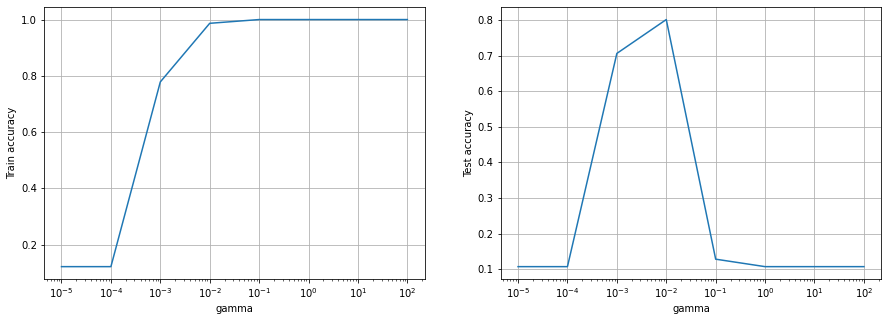

In [40]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []

# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS

for g in gamma_values:
    clf = SVC(kernel = "rbf", C = 1, gamma = g)
    clf.fit(X_train, y_train)
    
    scores = clf.score(X_train, y_train)
    train_acc_list.append(scores)
    
    scores = clf.score(X_test, y_test)
    test_acc_list.append(scores)

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 2
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

From the plots we notice that the accuracy on the training set increases with the value of gamma saturating at gamma=0.1. The test accuracy instead has a different behaviour, from the second graph we can see that it has a peak for gamma = 0.01 and then falls. Since the accuracy is computed as 1-error, one can say that while the training error declines monotonically with gamma's value, the test error has a minimum in gamma=0.01.
This behaviour is expected, since the value of gamma controls how precisely the training set is fit and when it is high we incur in the risk overfitting. The beavhiour of the second graph shows us exatcly what happens when gamma is too high, so when we try to fit the training set too closely. 
For wide gamma we have the best fit over the training set which, overfitting the latter concentrating only around the training data, doesn't allow a good generalization that can fit the test set, resulting in a bad classification of the test set.

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [41]:
X = X[permutation]
y = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC
m_test = 12000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts = True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [192 231 210 213 210 180 185 189 199 191]


## TO DO 7

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [42]:
#get training and test error for the best SVM model from CV

clf = SVC(kernel = "rbf", C = best_SVM["C"], gamma = best_SVM["gamma"])
clf.fit(X_train, y_train)

scores = clf.score(X_train, y_train)
training_error = 1-scores

scores = clf.score(X_test, y_test)
test_error = 1-scores 

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.114517


Just for comparison, let's also use logistic regression 

## TO DO 8 Try first without regularization (use a very large large C)¶

In [43]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(C = 1e5) #a large C disables regularization
logreg.fit(X_train, y_train) #learn from training set

training_error = 1-logreg.score(X_train, y_train)
test_error = 1-logreg.score(X_test, y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

/Users/lucaagosti/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best logistic regression training error: 0.000000
Best logistic regression test error: 0.275276


## TO DO 9 Try  with regularization (use C=1)¶

In [44]:
logreg = linear_model.LogisticRegression(C=1)
logreg.fit(X_train, y_train)

training_error = 1-logreg.score(X_train, y_train)
test_error = 1-logreg.score(X_test, y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.001000
Best logistic regression test error: 0.250603


/Users/lucaagosti/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## QUESTION 3
Compare and discuss:
- the results from SVM with m=600 and with m=2000 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

As expected, the increase of m from 600 to 2000 brought us much better results, indeed the test error is double for the case with m=600 than the one m=2000 data points.
The results for the logistic regression are the following: based on the test errors the regolarized one is worse than the unregolarized one (0.275 vs 0.251). However both the logistic regressions are much less accurate than the SVM (test error of 0.115 for SVM with m=2000 rather than 0.271 and 0.251 for the linear regressions), even for the case with 600 data points (for m=600 we have a test error of 0.172, still better than the linear regression).

## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

In [45]:
LR_prediction = logreg.predict(X_test) 
SVM_prediction = clf.predict(X_test)

INPUT:


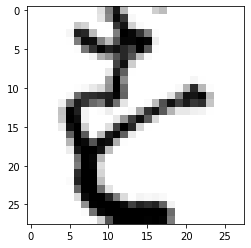

LABEL: 2
Index: 2
LR prediction:  8
SVM prediction:  2


In [46]:
for index, input, predictionSVM, predictionLR, label in zip(range(len(X_test)), X_test, SVM_prediction, LR_prediction, y_test):
    if predictionLR != label and predictionSVM == label:
        plot_input(X_test, y_test, index)
        print('Index:', index)
        print("LR prediction: ", LR_prediction[index])
        print("SVM prediction: ", SVM_prediction[index])
        break

## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [47]:
from sklearn.metrics import confusion_matrix

np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = confusion_matrix(y_test, SVM_prediction)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR = confusion_matrix(y_test, LR_prediction)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5808 5769 5790 5787 5790 5820 5815 5811 5801 5809]

 Confusion matrix SVM  
 
 [[5319   10    4   51  116   47    4   74  129   54]
 [  19 5121   77   61  128   13  155    4   87  104]
 [   0  103 4663  113   95   21  467   22  223   83]
 [  10   49   88 5399   57   47   26   21   76   14]
 [ 130   89  117   50 5111   13   63   35  100   82]
 [  31   93  117  179   69 5100   42   21  153   15]
 [  11  147  316   32  217    7 4916   70   81   18]
 [  56   24   70   67  185   14   33 5247   69   46]
 [  17  114   58   67   19   30  117    3 5360   16]
 [  16  262  130   30  138   10    9   26   66 5122]]

 Confusion matrix SVM (normalized)   
 
 [[0.92 0.   0.   0.01 0.02 0.01 0.   0.01 0.02 0.01]
 [0.   0.89 0.01 0.01 0.02 0.   0.03 0.   0.02 0.02]
 [0.   0.02 0.81 0.02 0.02 0.   0.08 0.   0.04 0.01]
 [0.   0.01 0.02 0.93 0.01 0.01 0.   0.   0.01 0.  ]
 [0.02 0.02 0.02 0.01 0.88 0.   0.01 0.01 0.02 0.01]
 [0.01 0.02 0.02 0.03 0.01 0.88 0.01 0.   0.0

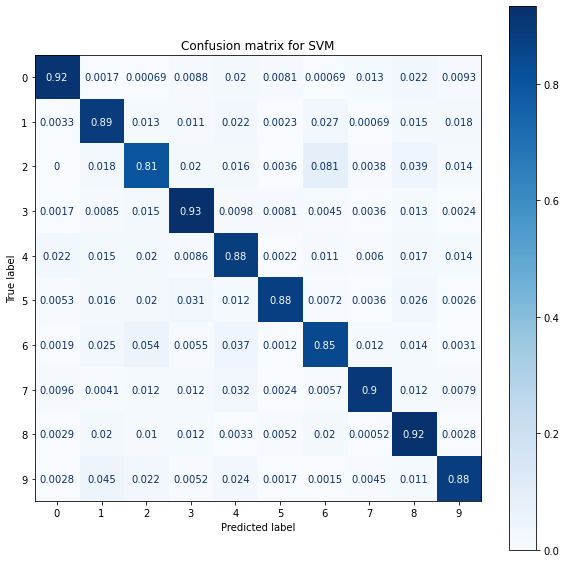

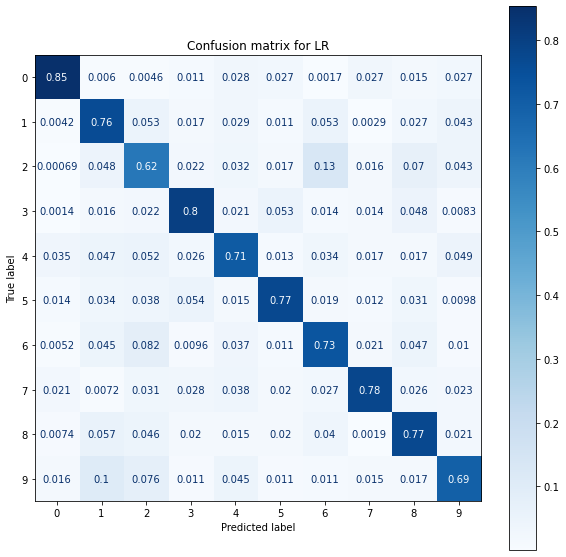

In [48]:
# ADD CODE TO NORMALIZE CONFUSION MATRIX AND PRINT THE NORMALIZED MATRIX

from sklearn.metrics import ConfusionMatrixDisplay

estimator = [clf, logreg]
title = ["Confusion matrix for SVM", "Confusion matrix for LR"]

for est in range(0,2):
    fig, ax = plt.subplots(figsize=(10, 10))
    disp = ConfusionMatrixDisplay.from_estimator(
        estimator[est],
        X_test,
        y_test,
        display_labels = labels,
        cmap = plt.cm.Blues,
        normalize = "true",
        ax = ax,
    )
    disp.ax_.set_title(title[est])

plt.show()

## QUESTION 4
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.

Looking at both tables we see that the largest values are, by far, the ones on the diagonal. This allows us to say that both SVM and LR work when applied to this classification task. We also notice, like we observed before, that the SVM has significantly better results than LR.
Talking about the cells not on the diagonal (the classification mistakes) we observe that the largest values (and so the most common classification mistakes) are in the same position for both the confusion matrixes. Three of the biggest error for SVM are in position (6,2), (2,6) and (1,9), but in. this positions also LR has 3 of the biggest errors. This brings me to belive that the most common cause for the errors are character which looks similar to each other, resulting in similar handwriting and therefore in an harded classification task. In fact we see that the character with label 2 -> す "su", looks similar to the one with label 6 -> ま "ma", and this is one of the most common classification mistakes of both SVM and LR.